In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import cv2

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models

In [2]:
# import dependencies
from IPython.display import display, Javascript
import PIL.Image
import cv2
import numpy as np
import io
import html
import time

In [4]:
# Get pretrained model using torchvision.models as models library
model = models.densenet161(pretrained=True)
# Turn off training for their parameters
for param in model.parameters():
    param.requires_grad = False

In [5]:
# Create new classifier for model using torch.nn as nn library
classifier_input = model.classifier.in_features
num_labels = 2 #PUT IN THE NUMBER OF LABELS IN YOUR DATA
classifier = nn.Sequential(nn.Linear(classifier_input, 1024),
                           nn.ReLU(),
                           nn.Linear(1024, 512),
                           nn.ReLU(),
                           nn.Linear(512, num_labels),
                           nn.LogSoftmax(dim=1))
# Replace default classifier with new classifier
model.classifier = classifier

In [6]:
# Set the error function using torch.nn as nn library
criterion = nn.NLLLoss()
# Set the optimizer function using torch.optim as optim library
optimizer = optim.Adam(model.classifier.parameters())

In [7]:
model.load_state_dict(torch.load("/Users/dhawalsingh/Downloads/your_model_path1.pt"))

<All keys matched successfully>

In [8]:
model.eval()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [9]:
# Process our image
def process_image(image_path):
    # Load Image
    #img = PIL.Image.open(image_path)
    img = PIL.Image.fromarray(image_path)
    # Get the dimensions of the image
    width, height = img.size
    
    # Resize by keeping the aspect ratio, but changing the dimension
    # so the shortest size is 255px
    img = img.resize((255, int(255*(height/width))) if width < height else (int(255*(width/height)), 255))
    
    # Get the dimensions of the new image size
    width, height = img.size
    
    # Set the coordinates to do a center crop of 224 x 224
    left = (width - 224)/2
    top = (height - 224)/2
    right = (width + 224)/2
    bottom = (height + 224)/2
    img = img.crop((left, top, right, bottom))
    
    # Turn image into numpy array
    img = np.array(img)
    
    # Make the color channel dimension first instead of last
    img = img.transpose((2, 0, 1))
    
    # Make all values between 0 and 1
    img = img/255
    
    # Normalize based on the preset mean and standard deviation
    img[0] = (img[0] - 0.485)/0.229
    img[1] = (img[1] - 0.456)/0.224
    img[2] = (img[2] - 0.406)/0.225
    
    # Add a fourth dimension to the beginning to indicate batch size
    img = img[np.newaxis,:]
    
    # Turn into a torch tensor
    image = torch.from_numpy(img)
    image = image.float()
    return image

In [10]:
def proces_image(image_path):
    # Load Image
    img = PIL.Image.open(image_path)
    #img = PIL.Image.fromarray(image_path)
    # Get the dimensions of the image
    width, height = img.size
    
    # Resize by keeping the aspect ratio, but changing the dimension
    # so the shortest size is 255px
    img = img.resize((255, int(255*(height/width))) if width < height else (int(255*(width/height)), 255))
    
    # Get the dimensions of the new image size
    width, height = img.size
    
    # Set the coordinates to do a center crop of 224 x 224
    left = (width - 224)/2
    top = (height - 224)/2
    right = (width + 224)/2
    bottom = (height + 224)/2
    img = img.crop((left, top, right, bottom))
    
    # Turn image into numpy array
    img = np.array(img)
    
    # Make the color channel dimension first instead of last
    img = img.transpose((2, 0, 1))
    
    # Make all values between 0 and 1
    img = img/255
    
    # Normalize based on the preset mean and standard deviation
    img[0] = (img[0] - 0.485)/0.229
    img[1] = (img[1] - 0.456)/0.224
    img[2] = (img[2] - 0.406)/0.225
    
    # Add a fourth dimension to the beginning to indicate batch size
    img = img[np.newaxis,:]
    
    # Turn into a torch tensor
    image = torch.from_numpy(img)
    image = image.float()
    return image

In [11]:
# Using our model to predict the label
def predict(image, model):
    # Pass the image through our model
    output = model.forward(image)
    
    # Reverse the log function in our output
    output = torch.exp(output)
    
    # Get the top predicted class, and the output percentage for
    # that class
    probs, classes = output.topk(1, dim=1)
    return probs.item(), classes.item()

In [12]:
# Show Image
def show_image(image):
    # Convert image to numpy
    image = image.numpy()
    
    # Un-normalize the image
    image[0] = image[0] * 0.226 + 0.445
    
    # Print the image
    fig = plt.figure(figsize=(25, 4))
    plt.imshow(np.transpose(image[0], (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The model is  99.99991655349731 % certain that the image has a predicted class of  1


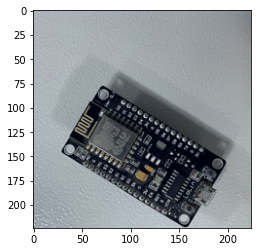

In [13]:
# Process Image
image = proces_image("/Users/dhawalsingh/Desktop/images_dataset/1_accept/IMG_7470.JPG")
# Give image to model to predict output
top_prob, top_class = predict(image, model)
# Show the image
show_image(image)
# Print the results
print("The model is ", top_prob*100, "% certain that the image has a predicted class of ", top_class  )

In [ ]:
# To Access realtime Web Cam

cam = cv2.VideoCapture(0) # Access web cam
cv2.namedWindow("test")
font = cv2.FONT_HERSHEY_SIMPLEX
while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    #cv2.imshow("test", frame)
    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressedprint("Escape hit, closing...")
        break
    else:
        frameRGB = frame[:,:,::-1]
        im=process_image(frameRGB)
    # Object detection logic   
        top_prob, top_class = predict(im, model)
        b=str(round(top_prob*100,2))+"%"
        c=str(round((1-top_prob)*100,2))+"%"
# Show the image
   # show_image(im)
# Print the results
        if (top_class==1 and top_prob>0.99):
            a="accepted"
            cv2.putText(frame, 
                'Accepted'+' '+b, 
                (50, 50), 
                font, 1, 
                (0, 255, 0), 
                2, 
                cv2.LINE_4)
            cv2.imshow("test", frame)            
        elif (top_class==0):
            a="rejected"
            cv2.putText(frame, 
                'Rejected'+' '+b, 
                (50, 50), 
                font, 1, 
                (0, 0, 255), 
                2, 
                cv2.LINE_4) 
            cv2.imshow("test", frame)   
        else:
             a="rejected"
             cv2.putText(frame, 
                'Cannot Comment'+' '+c, 
                (50, 50), 
                font, 1, 
                (0, 255, 255), 
                2, 
                cv2.LINE_4) 
             cv2.imshow("test", frame)                  
        #print("The image is", a  )
    

cam.release()
cv2.destroyAllWindows()    

In [ ]:
import cv2

cam = cv2.VideoCapture(0)

cv2.namedWindow("test")

img_counter = 0
while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressedprint("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "opencv_frame_{}.png".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1
# Process Image
image = proces_image("C:\\Users\\Z004K9RV\\Desktop\\Image Classification\\opencv_frame_0.png")
# Give image to model to predict output
top_prob, top_class = predict(image, model)
# Show the image
show_image(image)
if (top_class==1 and top_prob>0.989):
    a="accepted"
else:
    a="rejected"        
print("The image is", a  )
# Process Image
image = proces_image("C:\\Users\\Z004K9RV\\Desktop\\Image Classification\\opencv_frame_1.png")
# Give image to model to predict output
top_prob, top_class = predict(image, model)
# Show the image
show_image(image)
if (top_class==1 and top_prob>0.989):
    a="accepted"
else:
    a="rejected"        
print("The image is", a  )
# Process Image
image = proces_image("C:\\Users\\Z004K9RV\\Desktop\\Image Classification\\opencv_frame_2.png")
# Give image to model to predict output
top_prob, top_class = predict(image, model)
# Show the image
show_image(image)
if (top_class==1 and top_prob>0.989):
    a="accepted"
else:
    a="rejected"        
print("The image is", a  )
        
cam.release()

cv2.destroyAllWindows()